In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('db.csv', on_bad_lines='skip', sep='\t')

In [3]:
df

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале! ✌️️...,2017-02-28 19:55:32
1,channel1101170442,👑 Награждение победительницы конкурса красоты ...,2017-03-03 18:33:24
2,channel1101170442,🐍 Американский селекционер Джастин Кобылка пот...,2017-03-09 17:11:06
3,channel1101170442,"А вы за участие России в конкурсе \""Евровидени...",2017-03-14 11:13:27
4,channel1101170442,"Не болейте, друзья!",2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,"Порошенко заявил российским пранкерам, предста...",2022-11-17 16:06:13
118281,channel1101170442,"Израиль сообщил, что завершил испытания морско...",2022-11-17 16:06:57


# Removing stopwords

In [4]:
#pip install nltk

In [5]:
import nltk

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [7]:
stopsRUS = stopwords.words('russian')
stopsENG = stopwords.words('english')

stopsRUS.remove('не')
stopsENG.remove('not')

In [8]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewshatalov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopsRUS)
print(stopsENG)

['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем',

# removing emojies

In [10]:
import re
df_without_emoji = df

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df_without_emoji['message'] = df_without_emoji['message'].apply(deEmojify)

In [11]:
df_without_emoji

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале! Вс...,2017-02-28 19:55:32
1,channel1101170442,Награждение победительницы конкурса красоты с...,2017-03-03 18:33:24
2,channel1101170442,Американский селекционер Джастин Кобылка потр...,2017-03-09 17:11:06
3,channel1101170442,"А вы за участие России в конкурсе \""Евровидени...",2017-03-14 11:13:27
4,channel1101170442,"Не болейте, друзья!",2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,"Порошенко заявил российским пранкерам, предста...",2022-11-17 16:06:13
118281,channel1101170442,"Израиль сообщил, что завершил испытания морско...",2022-11-17 16:06:57


In [12]:
#nltk.download('punkt')

# Removing signs

In [13]:
df_without_signs = df_without_emoji

def deSigns(text):
    regrex_pattern = re.compile(pattern = '[!@"“’«»#\\\\$%&\'()*+,—/:;<=>?^_`{|}~\[\]]', flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
#def deSignsBackSlash(text):
#    regrex_pattern = re.compile(pattern = '\\\\', flags = re.UNICODE)
#    return regrex_pattern.sub(r'',text)

df_without_signs['message'] = df_without_signs['message'].apply(deSigns)
#df_without_signs['message'] = df_without_signs['message'].apply(deSignsBackSlash

In [14]:
df_without_signs

,from_id,message,date
0,channel1101170442,Приветствуем всех в нашем Telegram-канале Все...,2017-02-28 19:55:32
1,channel1101170442,Награждение победительницы конкурса красоты с...,2017-03-03 18:33:24
2,channel1101170442,Американский селекционер Джастин Кобылка потр...,2017-03-09 17:11:06
3,channel1101170442,А вы за участие России в конкурсе Евровидение,2017-03-14 11:13:27
4,channel1101170442,Не болейте друзья,2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,Брифинг Минобороны России,2022-11-17 15:54:29
118279,channel1101170442,Украинских экспертов допустили на место падени...,2022-11-17 15:57:53
118280,channel1101170442,Порошенко заявил российским пранкерам представ...,2022-11-17 16:06:13
118281,channel1101170442,Израиль сообщил что завершил испытания морской...,2022-11-17 16:06:57


# Lemmatization

In [15]:
#pip install pymorphy2

In [16]:
import pymorphy2

In [17]:
%%time
df_normal = df_without_signs

morph = pymorphy2.MorphAnalyzer()

def converter (sentence):
    list = []
    words = sentence.split()
    for item in words:
        list.append(morph.parse(item)[0].normal_form)
    return ' '.join(list) 

df_normal['message'] = df_normal['message'].apply(converter)

CPU times: user 7min 18s, sys: 1.05 s, total: 7min 19s
Wall time: 7min 20s


In [18]:
df_normal

,from_id,message,date
0,channel1101170442,приветствовать весь в наш telegram-канал всегд...,2017-02-28 19:55:32
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06
3,channel1101170442,а вы за участие россия в конкурс евровидение,2017-03-14 11:13:27
4,channel1101170442,не болеть друг,2017-03-14 19:49:56
...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29
118279,channel1101170442,украинский эксперт допустить на место падение ...,2022-11-17 15:57:53
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13
118281,channel1101170442,израиль сообщить что завершить испытание морск...,2022-11-17 16:06:57


# Tokenizing

In [19]:
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopsRUS)]))

In [20]:
df_tokenized = df_without_emoji
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

df_tokenized['tokenized'] = df_tokenized.apply(lambda x: tokenize(x['message']), axis=1)

In [21]:
df_tokenized

,from_id,message,date,tokenized
0,channel1101170442,приветствовать весь наш telegram-канал курс кл...,2017-02-28 19:55:32,"[приветствовать, весь, наш, курс, ключевой, со..."
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24,"[награждение, победительница, конкурс, красота..."
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06,"[американский, селекционер, джастин, кобылка, ..."
3,channel1101170442,участие россия конкурс евровидение,2017-03-14 11:13:27,"[участие, россия, конкурс, евровидение]"
4,channel1101170442,не болеть друг,2017-03-14 19:49:56,"[не, болеть, друг]"
...,...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29,"[брифинг, минобороны, россия]"
118279,channel1101170442,украинский эксперт допустить место падение рак...,2022-11-17 15:57:53,"[украинский, эксперт, допустить, место, падени..."
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13,"[порошенко, заявить, российский, пранкер, пред..."
118281,channel1101170442,израиль сообщить завершить испытание морской с...,2022-11-17 16:06:57,"[израиль, сообщить, завершить, испытание, морс..."


# word2vec

In [22]:
pip install gensim


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import gensim.downloader as api

model = api.load("word2vec-ruscorpora-300")

In [24]:
import numpy as np

In [25]:
def vectorize_message(message):
    # разбиваем сообщение на слова
    words = message.split()
    # получаем вектор для каждого слова в сообщении и усредняем их
    vectors = [model[word] for word in words if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [26]:
df_tokenized['message_vector'] = df_tokenized['message'].apply(vectorize_message)

In [27]:
df_tokenized

,from_id,message,date,tokenized,message_vector
0,channel1101170442,приветствовать весь наш telegram-канал курс кл...,2017-02-28 19:55:32,"[приветствовать, весь, наш, курс, ключевой, со...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,channel1101170442,награждение победительница конкурс красота сре...,2017-03-03 18:33:24,"[награждение, победительница, конкурс, красота...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,channel1101170442,американский селекционер джастин кобылка потра...,2017-03-09 17:11:06,"[американский, селекционер, джастин, кобылка, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,channel1101170442,участие россия конкурс евровидение,2017-03-14 11:13:27,"[участие, россия, конкурс, евровидение]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,channel1101170442,не болеть друг,2017-03-14 19:49:56,"[не, болеть, друг]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
118278,channel1101170442,брифинг минобороны россия,2022-11-17 15:54:29,"[брифинг, минобороны, россия]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
118279,channel1101170442,украинский эксперт допустить место падение рак...,2022-11-17 15:57:53,"[украинский, эксперт, допустить, место, падени...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
118280,channel1101170442,порошенко заявить российский пранкер представи...,2022-11-17 16:06:13,"[порошенко, заявить, российский, пранкер, пред...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
118281,channel1101170442,израиль сообщить завершить испытание морской с...,2022-11-17 16:06:57,"[израиль, сообщить, завершить, испытание, морс...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [28]:
vord2vec_matrix = np.array(df_tokenized['message_vector'].tolist())

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Преобразуем матрицу векторов в формат float
vord2vec_matrix = vord2vec_matrix.astype(float)

# Масштабируем матрицу векторов
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(vord2vec_matrix)

# Создаем объект PCA и задаем число компонент
pca = PCA(n_components=300)

# Применяем PCA к матрице векторов
reduced_vectors = pca.fit_transform(scaled_matrix)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:527: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [30]:
vord2vec_matrix = reduced_vectors

In [31]:
print(vord2vec_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from scipy.spatial.distance import cdist

In [81]:
x_small_row = []
x_small_col = []

for i in range(100, 199):
    for j in range(100, 199):
        x_small_row.append(vord2vec_matrix[i][j])
    x_small_col.append(x_small_row)
    x_small_row = []

In [82]:
cosine_simularities_2 = cdist(x_small_col, x_small_col, 'euclidean')

In [1]:
cosine_simularities_2

NameError: name 'cosine_simularities_2' is not defined

In [84]:
def sim(i, j):
    return float((1 + cosine_simularities_2[i][j]))

In [85]:
%%time
sim_matrix = []
sim_row = []
for i in range(0, 99):
    for j in range(0, 99):
        sim_row.append(sim(i, j))
    sim_matrix.append(sim_row)
    sim_row = []
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

CPU times: user 11.1 ms, sys: 297 µs, total: 11.4 ms
Wall time: 11.3 ms


In [86]:
from sklearn.cluster import AgglomerativeClustering
sim_matrix = np.array(cosine_simularities_2)
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)
clusters

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1])

# spaCY

In [33]:
#pip install spacy

In [34]:
#pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz

In [35]:
import spacy

In [111]:
start_clustering = 100
end_clustering = 150

In [112]:
nlp = spacy.load("ru_core_news_sm")
df_tokenized_2 = df_tokenized['message'][start_clustering:end_clustering + 1].apply(nlp)

In [113]:
df_tokenized_2

100    (вид, получить, название, марианский, морской,...
101    (запуск, falcon, heavy, состояться, следующий,...
102    (момоа, пояснить, наткнуться, спойлер, время, ...
103    (инженер, тольяттинский, компания, yagalet, за...
104    (смочь, решить, вопрос, украина, именно, прийт...
105    (торжественный, зажжение, высокий, мир, живой,...
106    (военный, изъять, несколько, тысяча, единица, ...
107    (ракета, -, носитель, среднее, класс, союз-2.1...
108    (бетти, миллер, подмешивать, яд, пища, напиток...
109    (полицейский, мартин, уиллис, около, 15, минут...
110    (добавить, всё, свой, ошибка, президент, украи...
111    (группа, получить, известность, благодаря, пес...
112    (новосибирский, область, пятеро, ребёнок, поги...
113    (мария, шарапов, серить, уильямс, принять, уча...
114    (идти, выборы, уникальный, программа, право, с...
115    (05.12.2017, соответствие, закон, российский, ...
116    (знаменитый, французский, певец, композитор, с...
117    (захаров, заявить, попыт

In [114]:
vectors_list = [doc.vector for doc in df_tokenized_2]


In [115]:
len(vectors_list)

51

In [116]:
from scipy.spatial.distance import cdist
cosine_distance_matrix = cdist(vectors_list, vectors_list, metric='cosine')

In [117]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

In [118]:
#%%time
#import matplotlib.pyplot as plt
#dendrogram = sch.dendrogram(sch.linkage(cosine_distance_matrix, method = 'ward'))
#plt.figure(figsize=(200, 500))
#plt.show()

In [119]:
len(cosine_distance_matrix)

51

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [97.5, 97.5, 142.5, 142.5],
  [53.75, 53.75, 120.0, 120.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [86.875, 86.875, 172.5, 172.5],
  [35.0, 35.0, 129.6875, 129.6875],
  [12.5, 12.5, 82.34375, 82.34375],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [262.5, 262.5, 290.0, 290.0],
  [240.0, 240.0, 276.25, 276.25],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [258.125, 258.125, 312.5, 312.5],
  [220.0, 220.0, 285.3125, 285.3125],
  [200.0, 200.0, 252.65625, 252.6562

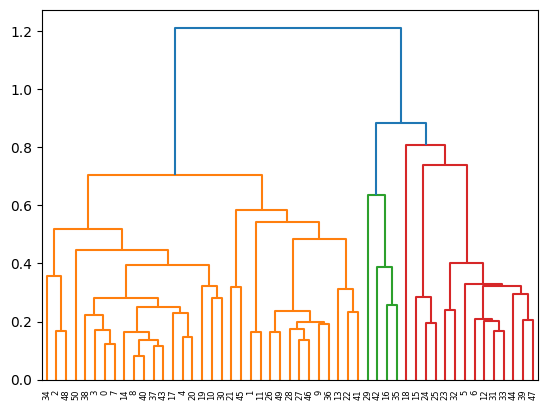

In [120]:
from scipy.spatial.distance import cdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
condensed_distance_matrix = squareform(cosine_distance_matrix, checks=False)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed_distance_matrix, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix)

Cluster 2: [5, 6, 12, 15, 16, 18, 23, 24, 25, 29, 31, 32, 33, 35, 39, 42, 44, 47]


In [132]:
from scipy.cluster.hierarchy import fcluster

# Assign each message to a cluster
max_distance = 0.5  # You may need to adjust this value based on the dendrogram
clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

# Create a dictionary that maps cluster numbers to message indices
cluster_dict = {}
for i in range(len(clusters)):
    if clusters[i] not in cluster_dict:
        cluster_dict[clusters[i]] = [i]
    else:
        cluster_dict[clusters[i]].append(i)

# Print the list of messages in each cluster
for i in range(1, 4):
    cluster_messages = [df_tokenized.iloc[j + start_clustering]['message'] for j in cluster_dict[i]]
    print(f"Cluster {i}: {cluster_messages}")


Cluster 1: ['момоа пояснить наткнуться спойлер время посещение съёмочный площадки. рассказать являться больший фанат сериал вовсе не хотеть ранний время знать всё закончится. nя воскликнуть черта не хотеть знать это вспоминать актёр.', 'всё-таки известный событие вторник не пройти мимо меня. вчера сесть голос сегодня подняться температура марш 10.12 обещать снова строй рядом заявить саакашвили.', 'это песков написать прочитать вопрос дать спасибо']
Cluster 2: ['вид получить название марианский морской слизень mariana snailfish обитать глубина 81 километра. это исследователь отмечать теория максимально возможный глубина пригодный существование рыба составлять 82 километра.', 'инженер тольяттинский компания yagalet задумать создать автомобиль который ездить летать. режим полёт машина смочь приподняться небольшой высота помощь воздушный подушки.', 'смочь решить вопрос украина именно прийти договорённость который устроить оба сторона получить позитивный результат. это потребовать серьёзный

In [127]:
for i in range(1, 3):
    print(f"Cluster {i}: {[df_tokenized['message'].iloc[j] for j in cluster_dict[i]]}")


Cluster 1: ['приветствовать весь наш telegram-канал курс ключевой событие', 'награждение победительница конкурс красота среди осудить мисс весна - 2017 колония общий режим женщина ик-10 уфсин россия приморский край', 'американский селекционер джастин кобылка потратить 8 год выведение питон смайлик кожа', 'участие россия конкурс евровидение', 'не болеть друг', 'идея переименование волгоград сталинград', 'поддерживать идея детский омбудсмен', 'нужный старшеклассник дисциплина', 'относиться идея положительно отрицательно', 'идея', 'весь праздник день победа', 'владимир путин президент молдавия игорь додон военный парад ознаменование 72-й годовщина победа великий отечественный война', 'солист aerosmith стивен тайлера время концерт олимпийский москва 23 май 2017 года. рок-группа дать единственный выступление россия рамка прощальный турне aero-vederci baby', 'выглядеть кот-мэр город талкитный штат аляска который скончаться возраст 20 лет. избрать неофициальный мэр городок ещё 1998 году. кот 

In [52]:
%%time
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(condensed_distance_matrix)

ValueError: Expected 2D array, got 1D array instead:
array=[0.99596653 1.04385962 1.07193406 ... 0.9055517  0.94017768 0.93516498].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
len(clusters)

18826

# Tf idf tokenizing

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
v = TfidfVectorizer()
x = v.fit_transform(df_tokenized['message'])

In [72]:
x

<118283x75907 sparse matrix of type '<class 'numpy.float64'>'
	with 1820588 stored elements in Compressed Sparse Row format>

In [62]:
print(x.toarray()[1])

[0. 0. 0. ... 0. 0. 0.]


In [63]:
sum(x.toarray()[2])

3.038988790620847

In [64]:
len(x.toarray()[81])

75907

In [65]:
#pip install pca

In [66]:
#from sklearn.decomposition import PCA

# Matrix of tf idf cosine simularities

In [67]:
from sklearn.metrics.pairwise import linear_kernel

In [68]:
from scipy.spatial.distance import cdist

In [69]:
#cdist using cdist

In [70]:
x_array = x.toarray()

In [71]:
x_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
x_small_row = []
x_small_col = []

for i in range(100, 199):
    for j in range(100, 199):
        x_small_row.append(x_array[i][j])
    x_small_col.append(x_small_row)
    x_small_row = []

In [34]:
cosine_simularities_2 = cdist(x_small_col, x_small_col, 'euclidean')

In [35]:
cosine_simularities_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:

for i in range(len(cosine_simularities_2)):
    for j in range(len(cosine_simularities_2[0])):
        cosine_simularities_2[i][j] *= 100


0

In [131]:
tf_idf_sum = 0
for i in cosine_simularities_2:
    tf_idf_sum += sum(i)
tf_idf_sum

2968.086890392515

In [94]:
#%%time
#cosine_simularities_2 = cdist(x_array, x_array, 'euclidean')

In [95]:
cosine_similarities = linear_kernel(x[100], x[100]).flatten()
cosine_similarities

array([1.])

In [96]:
#cdist using linear_kernel

In [97]:
#def cosine_similarity_for_ftidf(i, j):
#   if j < i:
#       return b[j][i]
#   cosine_similarities = linear_kernel(x[i], x[j]).flatten()
#   return cosine_similarities


#cosine_simularities_2 = cdist().flatten()
#def cosine_similarity_for_ftidf_2(i, j):
#    cosine_simularities_2 = cdist(x[i], x[j]).flatten()
#    return cosine_similarities

In [98]:
#%%time
#a = []
#b = []
#for i in range(100, 199):
#    for j in range(100, 199):
#        a.append(cosine_similarity_for_ftidf(i, j))
#    b.append(a)
#    a = []

In [99]:
#pd.set_option('display.max_rows', None)

# Matrix of date intervals

In [100]:
from datetime import datetime

In [101]:
def date_in_datetime(text):
    date = datetime.strptime(text, "%Y-%m-%d %H:%M:%S")
    return date

In [102]:
def date_interval(date_first, date_second):
    date1 = date_in_datetime(date_first)
    date2 = date_in_datetime(date_second)
    if date1 < date2:
        date3 = date2 - date1
    else:
        date3 = date1 - date2
    return date3.days * 24 + date3.seconds / 3600

In [103]:
#date1 = date_in_hours('2017-02-28 19:55:32')
#date2 = date_in_hours('2022-11-17 16:08:27')

In [104]:
#date_interval('2022-11-17 16:08:27', '2017-02-28 19:55:32')

In [105]:
df_tokenized.message[100000]

'радикал первомайский демонстрация париж разгромить кафе витрина здание бульвар вольтер'

In [106]:
len(df_tokenized)

118283

In [107]:
date_vec = []
for i in range(0, len(df_tokenized)):
    date_vec.append(df_tokenized.date[i])
    
min_time = date_interval(date_vec[0], date_vec[0])
    
max_time = date_interval(date_vec[0], date_vec[99])

def get_interval(i, j):
    #if j < i:
    #    return time_matrix[j][i]
    return ((date_interval(date_vec[i], date_vec[j]) - min_time) / (max_time - min_time))

In [108]:
get_interval(193, 192)

0.0029400462108272237

In [109]:
#x_time_small_row = []
#x_time_small_col = []

#for i in range(100, 199):
#    for j in range(100, 199):
#        x_time_small_row.append(x_array[i][j])
#    x_time_small_col.append(x_small_row)
#    x_time_small_row = []

In [110]:
import math

In [111]:
%%time
time_matrix = []
time_row = []
for i in range(100, 199):
    for j in range(100, 199):
        time_row.append(get_interval(i, j))
    time_matrix.append(time_row)
    time_row = []

CPU times: user 90.1 ms, sys: 1.79 ms, total: 91.9 ms
Wall time: 90.8 ms


In [112]:
#ттттуууууттттт

In [113]:
time_matrix[0][98]

0.08735988485993977

# Matrix of distances

In [114]:
import numpy as np

In [115]:
#len(sim_matrix[999])

In [123]:
#def sim(i, j):
#    if j < i:
#        return sim_matrix[j][i]
#    return float(2 * (1 + b[i][j]) * (1 + time_matrix[i][j]) )
def sim(i, j):
    #if j < i:
    #    return sim_matrix[j][i]
    return float((1 + cosine_simularities_2[i][j])) #* (1 + time_matrix[i][j]) )

In [124]:
%%time
sim_matrix = []
sim_row = []
for i in range(0, 99):
    for j in range(0, 99):
        sim_row.append(sim(i, j))
    sim_matrix.append(sim_row)
    sim_row = []

CPU times: user 11.9 ms, sys: 390 µs, total: 12.3 ms
Wall time: 12.1 ms


In [125]:
sim_np_matrix = np.matrix(sim_matrix)

CPU times: user 11.9 ms, sys: 322 µs, total: 12.2 ms
Wall time: 12 ms


In [126]:
import scipy.cluster.hierarchy as sch

In [127]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
%%time
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(sim_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()
%%time
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)

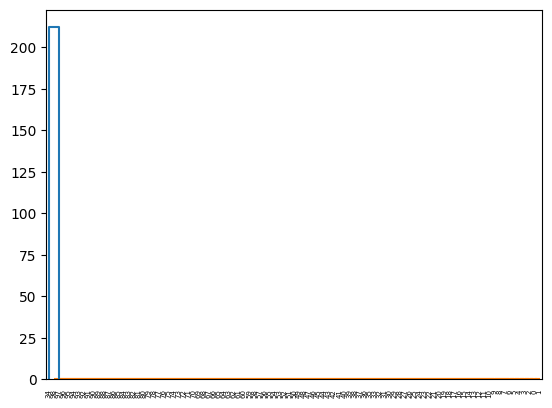

<Figure size 20000x50000 with 0 Axes>

CPU times: user 746 ms, sys: 30.4 ms, total: 776 ms
Wall time: 416 ms


In [128]:
%%time
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(sim_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()

In [129]:
%%time
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)

CPU times: user 3.44 ms, sys: 1.13 ms, total: 4.57 ms
Wall time: 3.16 ms


In [130]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 11, 10,  9,  8,  3,  6,  5,  4,  1,  2])

# def for clustering

In [67]:
def new_clusters(mat_start, mat_end, num_of_clusters):
    f_x_small_row = []
    f_x_small_col = []

    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            f_x_small_row.append(x_array[i][j])
        f_x_small_col.append(f_x_small_row)
        f_x_small_row = []
    f_cosine_simularities_2 = cdist(f_x_small_col, f_x_small_col, 'euclidean')
    f_time_matrix = []
    f_time_row = []
    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            f_time_row.append(get_interval(i, j))
        f_time_matrix.append(f_time_row)
        f_time_row = []
    f_sim_matrix = []
    f_sim_row = []
    mat_end = mat_end - mat_start - 1
    mat_start = 0
    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            f_sim_row.append(sim(i, j))
        f_sim_matrix.append(f_sim_row)
        f_sim_row = []
    f_sim_np_matrix = np.matrix(f_sim_matrix)
    #cluster = AgglomerativeClustering(n_clusters=num_of_clusters, affinity='euclidean', linkage='ward')
    #clusters = cluster.fit_predict(sim_matrix)
    return f_sim_np_matrix

In [68]:
def sim(i, j):
    return float((1 + tf_idf_matrix[i][j]))#* (1 + time_matrix[i][j]))
    #return float((1 + time_matrix[i][j]))

In [69]:
def cosine_similarity_for_ftidf(i, j):
    cosine_similarities = linear_kernel(x[i], x[j]).flatten()
    return cosine_similarities
def tf_idf_matrix_func(mat_start, mat_end):
    a = []
    b = []
    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            a.append(cosine_similarity_for_ftidf(mat_start, mat_end))
        b.append(a)
        a = []
    return b

In [70]:
def tf_idf_matrix_func(mat_start, mat_end):
    f_x_small_row = []
    f_x_small_col = []

    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            f_x_small_row.append(x_array[i][j])
        f_x_small_col.append(f_x_small_row)
        f_x_small_row = []
    f_cosine_simularities_2 = cdist(f_x_small_col, f_x_small_col, 'euclidean')
    return f_cosine_simularities_2

In [71]:
def time_matrix_func(mat_start, mat_end):
    f_time_matrix = []
    f_time_row = []
    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            f_time_row.append(get_interval(i, j))
        f_time_matrix.append(f_time_row)
        f_time_row = []
    return f_time_matrix

In [72]:
def sim_matrix_func(mat_start, mat_end):
    f_sim_matrix = []
    f_sim_row = []
    mat_end = mat_end - mat_start - 1
    mat_start = 0
    for i in range(mat_start, mat_end):
        for j in range(mat_start, mat_end):
            f_sim_row.append(sim(i, j))
        f_sim_matrix.append(f_sim_row)
        f_sim_row = []
    f_sim_np_matrix = np.matrix(f_sim_matrix)
    return f_sim_np_matrix

In [73]:
#sim_matrix = new_clusters(0, 100, 10)
#cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
#cluster_model = cluster.fit(sim_matrix)
#clasters = cluster.fit_predict(sim_matrix)

# first clustering

In [74]:
mat_start = 200
mat_end = 300

In [75]:
# create sim_matrix for first clasterising
tf_idf_matrix = tf_idf_matrix_func(mat_start, mat_end)
time_matrix = time_matrix_func(mat_start, mat_end)
sim_matrix = sim_matrix_func(mat_start, mat_end) 

In [76]:
sim_matrix

matrix([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]])

In [77]:
sim_matrix = np.array(sim_matrix)

In [78]:
#clusterise for firts sim_matrix
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [79]:
cluster_first_clustering = cluster
sim_matrix_firts_clustering = sim_matrix

In [80]:
# create list if indices
cluster_indices = [np.where(cluster_first_clustering.labels_ == i)[0] for i in range(10)]

In [81]:
cluster_indices

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 array([98]),
 array([97]),
 array([96]),
 array([95]),
 array([94]),
 array([93]),
 array([92]),
 array([91]),
 array([90])]

In [82]:
point_array = sim_matrix_firts_clustering

In [83]:
point_array

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [84]:
# find coordinates of pints for every claster 
n_points = point_array.shape[0] # number of points in sim_matrix for first clusterising
cluster_points = []
for indices in cluster_indices:
    points = np.zeros((len(indices), point_array.shape[1]))
    for i, index in enumerate(indices):
        points[i, :] = point_array[index, :n_points]
    cluster_points.append(points)

In [85]:
len(cluster_points[6])

1

In [86]:
cluster_points[6][0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
number_of_points_in_sim_matrix = point_array.shape[0]
additional_sim_matrix = sim_matrix
for j in range(6):
    new_point = cluster_points[7][j]
    new_sim_matrix = np.zeros((number_of_points_in_sim_matrix + 1, number_of_points_in_sim_matrix + 1))
    new_sim_matrix[:number_of_points_in_sim_matrix, :number_of_points_in_sim_matrix] = additional_sim_matrix
    for i in range(number_of_points_in_sim_matrix):
        dist = np.linalg.norm(new_point - additional_sim_matrix[i])
        new_sim_matrix[number_of_points_in_sim_matrix, i] = dist
        new_sim_matrix[i, number_of_points_in_sim_matrix] = dist
    additional_sim_matrix = new_sim_matrix
    number_of_points_in_sim_matrix += 1

In [ ]:
new_point = cluster_points[7][5]   # new point to add

In [ ]:
number_of_points_in_sim_matrix = point_array.shape[0]

In [ ]:
# create new_sim_matrix with size (number of existing point + number of points to add)
new_sim_matrix = np.zeros((number_of_points_in_sim_matrix+6, number_of_points_in_sim_matrix+6))

In [ ]:
# fill new_sim_matrix with values from sim_matrix
new_sim_matrix[:number_of_points_in_sim_matrix, :number_of_points_in_sim_matrix] = sim_matrix

In [ ]:
test_new_sim_matrix = new_sim_matrix

In [ ]:
# add new point and find distances for all other points
for i in range(number_of_points_in_sim_matrix):
    dist = np.linalg.norm(new_point - sim_matrix[i])
    new_sim_matrix[number_of_points_in_sim_matrix, i] = dist
    new_sim_matrix[i, number_of_points_in_sim_matrix] = dist

In [ ]:
new_sim_matrix[number_of_points_in_sim_matrix, 4]

In [ ]:
new_sim_matrix[80][100]

In [ ]:
new_sim_matrix.shape[0]

# second try of using partial clustering

In [ ]:
mat_start = 100
mat_end = 200
tf_idf_matrix = tf_idf_matrix_func(mat_start, mat_end)
time_matrix = time_matrix_func(mat_start, mat_end)
sim_matrix = sim_matrix_func(mat_start, mat_end) 

In [ ]:
sim_matrix = np.array(sim_matrix)
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)
clusters

In [ ]:
for i in range(len(clusters)):
    if clusters[i] == 6:
        print(i)

In [ ]:
#lets choose some point from cluster "6", let it be number 93 => in dataset it is number 193

In [ ]:
mat_start = 200
mat_end = 300
tf_idf_matrix = tf_idf_matrix_func(mat_start, mat_end)
time_matrix = time_matrix_func(mat_start, mat_end)
sim_matrix = sim_matrix_func(mat_start, mat_end) 

In [ ]:
sim_matrix = np.array(sim_matrix)
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)
clusters

In [ ]:
sim_matrix

In [ ]:
#add one point to new matrix of dictances for secong clusterisation
n_sim_matrix = sim_matrix.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

for i in range (n_sim_matrix + 1):
    for j in range(i+1, n_sim_matrix + 1):
        if i == n_sim_matrix:
            sim_matrix_new[i, j] = (1 + linear_kernel(x[193], x[j + mat_start], 'euclidean')) * (1 + get_interval(193, j + mat_start))
        elif j == n_sim_matrix:
            sim_matrix_new[i, j] = (1 + linear_kernel(x[i + mat_start], x[193], 'euclidean')) * (1 + get_interval(i + mat_start, 193))
        else:
            sim_matrix_new[i, j] = sim_matrix[i, j]
        sim_matrix_new[j, i] = sim_matrix_new[i, j]

In [ ]:
sim_matrix

In [ ]:
sim_matrix_new

In [ ]:
len(sim_matrix_new[0])

In [ ]:
num_in_new_sim_matrix

In [ ]:
from random import uniform
number_to_add = 5

num_in_new_sim_matrix = len(sim_matrix_new[0])

new_size = num_in_new_sim_matrix + number_to_add
new_matrix = np.zeros((new_size, new_size))

new_matrix[:num_in_new_sim_matrix, :num_in_new_sim_matrix] = sim_matrix_new

for i in range(number_to_add):
    random_deviation = uniform(0.001, 0.01)
    new_matrix[num_in_new_sim_matrix+i, :num_in_new_sim_matrix] = sim_matrix_new[-1, :] + random_deviation
    new_matrix[:num_in_new_sim_matrix, num_in_new_sim_matrix+i] = sim_matrix_new[:, -1] + random_deviation

new_matrix[num_in_new_sim_matrix:, num_in_new_sim_matrix:] = np.zeros((number_to_add, number_to_add))

print(new_matrix)

In [ ]:
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(new_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(new_sim_matrix)
clusters


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 8, 8, 8, 8, 8, 9, 9, 9,
       9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6,
       6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7])

# third try of clustering

In [ ]:
#main idea of this part:
#clusterise first part 
#create new matrix with "clouds" of points
#add new points to new matrix

In [ ]:
mat_start = 100
mat_end = 200
tf_idf_matrix = tf_idf_matrix_func(mat_start, mat_end)
time_matrix = time_matrix_func(mat_start, mat_end)
sim_matrix = sim_matrix_func(mat_start, mat_end) 

In [ ]:
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(sim_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()

In [ ]:
sim_matrix = np.array(sim_matrix)
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)
clusters

In [ ]:
mat_start = 200
mat_end = 220
tf_idf_matrix = tf_idf_matrix_func(mat_start, mat_end)
time_matrix = time_matrix_func(mat_start, mat_end)
sim_matrix_second = sim_matrix_func(mat_start, mat_end) 

In [ ]:
sim_matrix = sim_matrix_second

In [ ]:
for i in range(len(clusters)):
    if clusters[i] == 4:
        print(i)

In [ ]:
points_previous_clustering = [147, 121, 188, 103, 175]

In [ ]:
#add one point to new matrix of dictances for secong clusterisation
n_sim_matrix = sim_matrix.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

for i in range (n_sim_matrix + 1):
    for j in range(i+1, n_sim_matrix + 1):
        if i == n_sim_matrix:
            sim_matrix_new[i, j] = (1 + linear_kernel(x[147], x[j + mat_start], 'euclidean')) * (1 + get_interval(147, j + mat_start))
        elif j == n_sim_matrix:
            sim_matrix_new[i, j] = (1 + linear_kernel(x[i + mat_start], x[147], 'euclidean')) * (1 + get_interval(i + mat_start, 147))
        else:
            sim_matrix_new[i, j] = sim_matrix[i, j]
        sim_matrix_new[j, i] = sim_matrix_new[i, j]

In [ ]:
from random import uniform
number_to_add = 5

num_in_new_sim_matrix = len(sim_matrix_new[0])

new_size = num_in_new_sim_matrix + number_to_add
new_matrix = np.zeros((new_size, new_size))

new_matrix[:num_in_new_sim_matrix, :num_in_new_sim_matrix] = sim_matrix_new

for i in range(number_to_add):
    random_deviation = uniform(0.001, 0.01)
    new_matrix[num_in_new_sim_matrix+i, :num_in_new_sim_matrix] = sim_matrix_new[-1, :] + random_deviation
    new_matrix[:num_in_new_sim_matrix, num_in_new_sim_matrix+i] = sim_matrix_new[:, -1] + random_deviation

new_matrix[num_in_new_sim_matrix:, num_in_new_sim_matrix:] = np.zeros((number_to_add, number_to_add))

print(new_matrix)

In [ ]:
#add one point to new matrix of dictances for secong clusterisation
sim_matrix_new = new_matrix
sim_matrix_copy = sim_matrix_new
n_sim_matrix = sim_matrix_new.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

sim_matrix_new[:n_sim_matrix, :n_sim_matrix] = sim_matrix_copy

for i in range (n_sim_matrix):
    if i <= 105:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[121], x[i + mat_start], 'euclidean')) * (1 + get_interval(121, i + mat_start))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[121], x[i + mat_start], 'euclidean')) * (1 + get_interval(121, i + mat_start))
    else:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[121], x[points_previous_clustering[0]], 'euclidean')) * (1 + get_interval(121, points_previous_clustering[0]))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[121], x[points_previous_clustering[0]], 'euclidean')) * (1 + get_interval(121, points_previous_clustering[0]))

In [ ]:
print(sim_matrix_new)

In [ ]:
from random import uniform
number_to_add = 5

num_in_new_sim_matrix = len(sim_matrix_new[0])

new_size = num_in_new_sim_matrix + number_to_add
new_matrix = np.zeros((new_size, new_size))

new_matrix[:num_in_new_sim_matrix, :num_in_new_sim_matrix] = sim_matrix_new

for i in range(number_to_add):
    random_deviation = uniform(0.001, 0.01)
    new_matrix[num_in_new_sim_matrix+i, :num_in_new_sim_matrix] = sim_matrix_new[-1, :] + random_deviation
    new_matrix[:num_in_new_sim_matrix, num_in_new_sim_matrix+i] = sim_matrix_new[:, -1] + random_deviation

new_matrix[num_in_new_sim_matrix:, num_in_new_sim_matrix:] = np.zeros((number_to_add, number_to_add))

print(new_matrix)

In [ ]:
#add one point to new matrix of dictances for secong clusterisation
sim_matrix_new = new_matrix
sim_matrix_copy = sim_matrix_new
n_sim_matrix = sim_matrix_new.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

sim_matrix_new[:n_sim_matrix, :n_sim_matrix] = sim_matrix_copy

for i in range (n_sim_matrix):
    if i <= 105:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[points_previous_clustering[2]], x[i + mat_start], 'euclidean')) * (1 + get_interval(points_previous_clustering[2], i + mat_start))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[points_previous_clustering[2]], x[i + mat_start], 'euclidean')) * (1 + get_interval(points_previous_clustering[2], i + mat_start))
    else:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[points_previous_clustering[2]], x[points_previous_clustering[1]], 'euclidean')) * (1 + get_interval(points_previous_clustering[2], points_previous_clustering[1]))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[points_previous_clustering[2]], x[points_previous_clustering[1]], 'euclidean')) * (1 + get_interval(points_previous_clustering[2], points_previous_clustering[1]))
print(sim_matrix_new)

In [ ]:
from random import uniform
number_to_add = 5

num_in_new_sim_matrix = len(sim_matrix_new[0])

new_size = num_in_new_sim_matrix + number_to_add
new_matrix = np.zeros((new_size, new_size))

new_matrix[:num_in_new_sim_matrix, :num_in_new_sim_matrix] = sim_matrix_new

for i in range(number_to_add):
    random_deviation = uniform(0.001, 0.01)
    new_matrix[num_in_new_sim_matrix+i, :num_in_new_sim_matrix] = sim_matrix_new[-1, :] + random_deviation
    new_matrix[:num_in_new_sim_matrix, num_in_new_sim_matrix+i] = sim_matrix_new[:, -1] + random_deviation

new_matrix[num_in_new_sim_matrix:, num_in_new_sim_matrix:] = np.zeros((number_to_add, number_to_add))

print(new_matrix)

In [ ]:
#add one point to new matrix of dictances for secong clusterisation
sim_matrix_new = new_matrix
sim_matrix_copy = sim_matrix_new
n_sim_matrix = sim_matrix_new.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

sim_matrix_new[:n_sim_matrix, :n_sim_matrix] = sim_matrix_copy

for i in range (n_sim_matrix):
    if i <= 105:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[points_previous_clustering[3]], x[i + mat_start], 'euclidean')) * (1 + get_interval(points_previous_clustering[3], i + mat_start))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[points_previous_clustering[3]], x[i + mat_start], 'euclidean')) * (1 + get_interval(points_previous_clustering[3], i + mat_start))
    else:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[points_previous_clustering[3]], x[points_previous_clustering[2]], 'euclidean')) * (1 + get_interval(points_previous_clustering[3], points_previous_clustering[2]))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[points_previous_clustering[3]], x[points_previous_clustering[2]], 'euclidean')) * (1 + get_interval(points_previous_clustering[3], points_previous_clustering[2]))
print(sim_matrix_new)

In [ ]:
from random import uniform
number_to_add = 5

num_in_new_sim_matrix = len(sim_matrix_new[0])

new_size = num_in_new_sim_matrix + number_to_add
new_matrix = np.zeros((new_size, new_size))

new_matrix[:num_in_new_sim_matrix, :num_in_new_sim_matrix] = sim_matrix_new

for i in range(number_to_add):
    random_deviation = uniform(0.001, 0.01)
    new_matrix[num_in_new_sim_matrix+i, :num_in_new_sim_matrix] = sim_matrix_new[-1, :] + random_deviation
    new_matrix[:num_in_new_sim_matrix, num_in_new_sim_matrix+i] = sim_matrix_new[:, -1] + random_deviation

new_matrix[num_in_new_sim_matrix:, num_in_new_sim_matrix:] = np.zeros((number_to_add, number_to_add))

print(new_matrix)

In [ ]:
#add one point to new matrix of dictances for secong clusterisation
sim_matrix_new = new_matrix
sim_matrix_copy = sim_matrix_new
n_sim_matrix = sim_matrix_new.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

sim_matrix_new[:n_sim_matrix, :n_sim_matrix] = sim_matrix_copy

for i in range (n_sim_matrix):
    if i <= 105:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[points_previous_clustering[4]], x[i + mat_start], 'euclidean')) * (1 + get_interval(points_previous_clustering[4], i + mat_start))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[points_previous_clustering[4]], x[i + mat_start], 'euclidean')) * (1 + get_interval(points_previous_clustering[4], i + mat_start))
    else:
        sim_matrix_new[i, n_sim_matrix] = (1 + linear_kernel(x[points_previous_clustering[4]], x[points_previous_clustering[3]], 'euclidean')) * (1 + get_interval(points_previous_clustering[4], points_previous_clustering[3]))
        sim_matrix_new[n_sim_matrix, i] = (1 + linear_kernel(x[points_previous_clustering[4]], x[points_previous_clustering[3]], 'euclidean')) * (1 + get_interval(points_previous_clustering[4], points_previous_clustering[3]))
print(sim_matrix_new)

In [ ]:
from random import uniform
number_to_add = 5

num_in_new_sim_matrix = len(sim_matrix_new[0])

new_size = num_in_new_sim_matrix + number_to_add
new_matrix = np.zeros((new_size, new_size))

new_matrix[:num_in_new_sim_matrix, :num_in_new_sim_matrix] = sim_matrix_new

for i in range(number_to_add):
    random_deviation = uniform(0.001, 0.01)
    new_matrix[num_in_new_sim_matrix+i, :num_in_new_sim_matrix] = sim_matrix_new[-1, :] + random_deviation
    new_matrix[:num_in_new_sim_matrix, num_in_new_sim_matrix+i] = sim_matrix_new[:, -1] + random_deviation

new_matrix[num_in_new_sim_matrix:, num_in_new_sim_matrix:] = np.zeros((number_to_add, number_to_add))

print(new_matrix)

In [ ]:
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(sim_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(new_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()

In [ ]:
sim_matrix = np.array(sim_matrix)
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(sim_matrix)
clusters

In [ ]:
sim_matrix = np.array(sim_matrix)
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(new_matrix)
clusters

In [ ]:

n_sim_matrix = sim_matrix_new.shape[0]
print(n_sim_matrix)
sim_matrix_new_copy = sim_matrix_new
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

for i in range (n_sim_matrix + 1):
    for j in range(i+1, n_sim_matrix + 1):
        print(i)
        if i == n_sim_matrix - 1:
            sim_matrix_new[i, j] = (1 + linear_kernel(x[193], x[j + mat_start], 'euclidean')) * (1 + get_interval(193, j + mat_start))
        elif j == n_sim_matrix:
            sim_matrix_new[i, j] = (1 + linear_kernel(x[i + mat_start], x[193], 'euclidean')) * (1 + get_interval(i + mat_start, 193))
            #print(sim_matrix_new[i, j])

        else:
            sim_matrix_new[i, j] = sim_matrix_new_copy[i, j]
            #print(sim_matrix_new[i, j])
        #sim_matrix_new[j, i] = sim_matrix_new_copy[i, j]

In [ ]:
sim_matrix_new

In [ ]:
n_sim_matrix = sim_matrix_new.shape[0]
sim_matrix_new = np.zeros((n_sim_matrix+1, n_sim_matrix+1))

for i in range (n_sim_matrix):
    sim_matrix_new[i].append(sim_matrix_new[i][n_sim_matrix])

In [ ]:
len(sim_matrix_new[1])

In [ ]:
sim_matrix_new

In [ ]:
n_sim_matrix

In [ ]:
new_sim_matrix

In [ ]:
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(sim_matrix, method = 'ward'))
plt.figure(figsize=(200, 500))
plt.show()

In [ ]:
#clusterise second time
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(new_sim_matrix)
clusters

     ([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 8, 8, 8, 8, 8, 9, 9, 9,
       9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6,
       6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7])

In [ ]:
mat_start = 100
mat_end = 200
tf_idf_matrix = tf_idf_matrix_func(mat_start, mat_end)
time_matrix = time_matrix_func(mat_start, mat_end)
sim_matrix = sim_matrix_func(mat_start, mat_end) 

In [ ]:
plt.scatter(x=[:1], y=[:1], c = df_tokenized_1000.cluster, cmap='rainbow' )

In [ ]:
df.message[112]

In [ ]:
df.message[93]

In [ ]:
df.message[94]

In [ ]:
df.message[291]

In [ ]:
df.message[306]

In [ ]:
df.message[307]

In [ ]:
df.message[162]

In [ ]:
df.message[999]

In [ ]:
df_tokenized_10000 = df_tokenized.drop(index=range(10000, 118283))

In [ ]:
df_tokenized_10000

In [ ]:
df_tokenized_10000['cluster'] = clusters

In [ ]:
df_tokenized_10000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Pull out a specific subset of networks
used_networks = [1, 2, 3, 4, 5, 6, 7,8, 9, 10]
#used_columns = (df.columns.get_level_values("cluster")
#                          .astype(int)
#                          .isin(used_networks))
#df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
#corr_df = df.corr().groupby(level="ckuster").mean()
#corr_df.index = corr_df.index.astype(int)
#corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=sim_np_matrix, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

In [ ]:
sns.violinplot(data=df_tokenized_10000, x="cluster", y="date", palette="Set3")

In [ ]:
a = false
b = 9.4


In [ ]:
firstnum = 7
secondnum = 6
firstnum / secondnum

In [ ]:
f(x) = 2 if x < -9
f(x) = -7*x + -9 if x >= -9
f(x) = 2*x^8 + 9*x^5 - 2*x^2 - 10*x if x == -4
f(x) = -10*x + -8 if x > 0